# Effects of Trip Characteristics on Their Duration
## by Abd AlJalil Nasser

## Investigation Overview

> In this investigation, I wanted to look at the characteristics of trip that could be used to predict number of trips and their duration. The main focus was on the five: day of the week, month of the year ,hour of the day, rental access method , end station, user type, rental access method .

## Dataset Overview
 > Bay wheels is a regional public bicycle sharing system in California's San Francisco Bay Area.Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States .
The dataset cotains the trips for 2019 year.
Each trip is anonymized and includes:
Trip Duration (seconds)
, Start Time and Date 
, End Time and Date
, Start Station ID
, Start Station Name
, Start Station Latitude
, Start Station Longitude
, End Station ID
, End Station Name
, End Station Latitude
, End Station Longitude
, Bike ID
, User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
, month name and day name .

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
Baywheel_19 = pd.read_csv("Baywheel_19_clean.csv",parse_dates=['start_time','end_time'])

In [4]:
Baywheel_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 19 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   Unnamed: 0               int64         
 1   duration_sec             int64         
 2   start_time               datetime64[ns]
 3   end_time                 datetime64[ns]
 4   start_station_id         int64         
 5   start_station_name       object        
 6   start_station_latitude   float64       
 7   start_station_longitude  float64       
 8   end_station_id           int64         
 9   end_station_name         object        
 10  end_station_latitude     float64       
 11  end_station_longitude    float64       
 12  bike_id                  int64         
 13  user_type                object        
 14  bike_share_for_all_trip  object        
 15  rental_access_method     object        
 16  duration_min             float64       
 17  month                    ob

## Distribtion of trip duration 

>tip duration in the dataset take on range of values from about 1 minute to 100 minutes.Plotted on a decimal scale, the distribution of trip duration takes a right skewed. Trip durations mostly centered at values less than 30 minutes with peak arround 8 minutes .

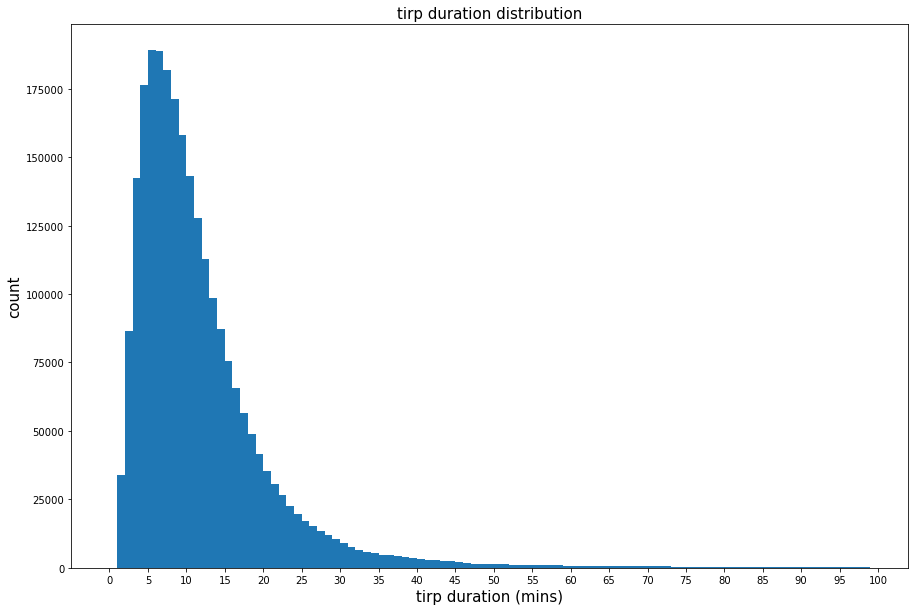

In [7]:
bins = np.arange(0,100,1)
ticks = np.arange(0,105,5)
plt.figure(figsize = [15,10])
plt.hist(data = Baywheel_19 , x = 'duration_min', bins = bins)
plt.title("tirp duration distribution",fontsize = 15)
plt.xlabel('tirp duration (mins)',fontsize = 15)
plt.xticks(ticks)
plt.ylabel("count",fontsize = 15);

## Number of trips in each month of the year

> july is the month with the highest number of trips followed by March .
December is the month the lowest number of trips.

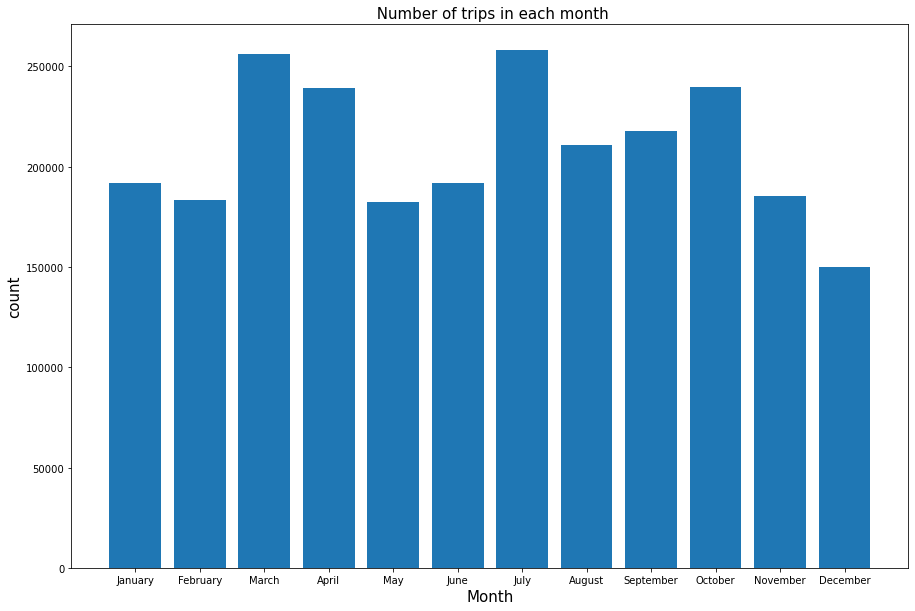

In [8]:
plt.figure(figsize = [15,10])
monthes = ['January' , 'February', 'March','April','May','June' , 'July','August','September', 'October','November','December']
plt.bar(height = Baywheel_19.month.value_counts().reindex(monthes), x = monthes)
plt.title(" Number of trips in each month",fontsize = 15)
plt.xlabel('Month',fontsize = 15)
plt.ylabel("count",fontsize = 15);

## Number of trips in each day of the week

> Tuseday is the day with the highest number of trips followed by Thursday .
Sunday is is the day with the lowest number of trips .

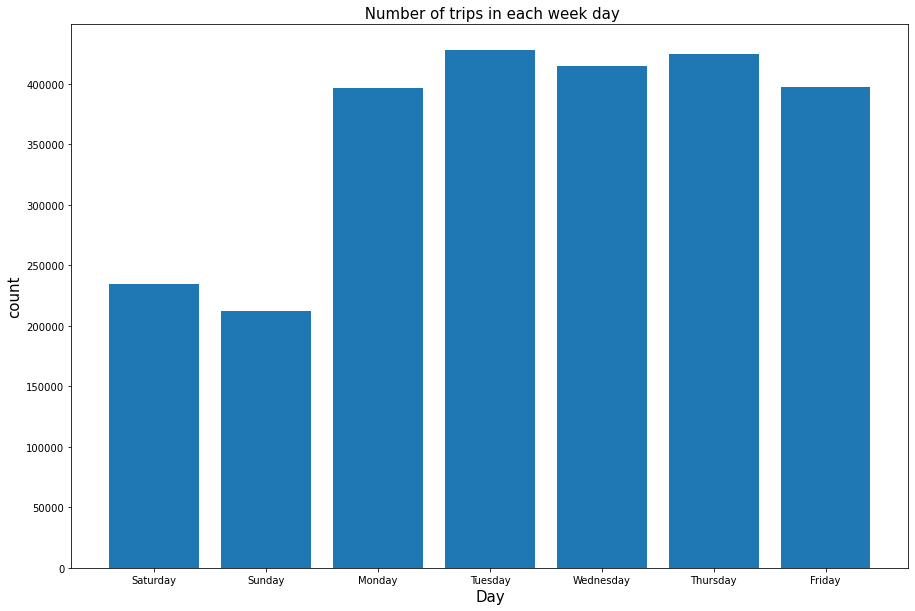

In [9]:
plt.figure(figsize = [15,10])
days = ['Saturday' , 'Sunday', 'Monday','Tuesday','Wednesday','Thursday' , 'Friday']
plt.bar(height = Baywheel_19.day_name.value_counts().reindex(days), x = days)
plt.title(" Number of trips in each week day",fontsize = 15)
plt.xlabel('Day',fontsize = 15)
plt.ylabel("count",fontsize = 15);

## Number of trips in each hour of the day
> Hour 17 in the day is the hour with the highest number of trips followed by hour 8 and hour 18 .
Hour 3 in the day is the lowest number of trips followed by hour 4 and hour 2 .


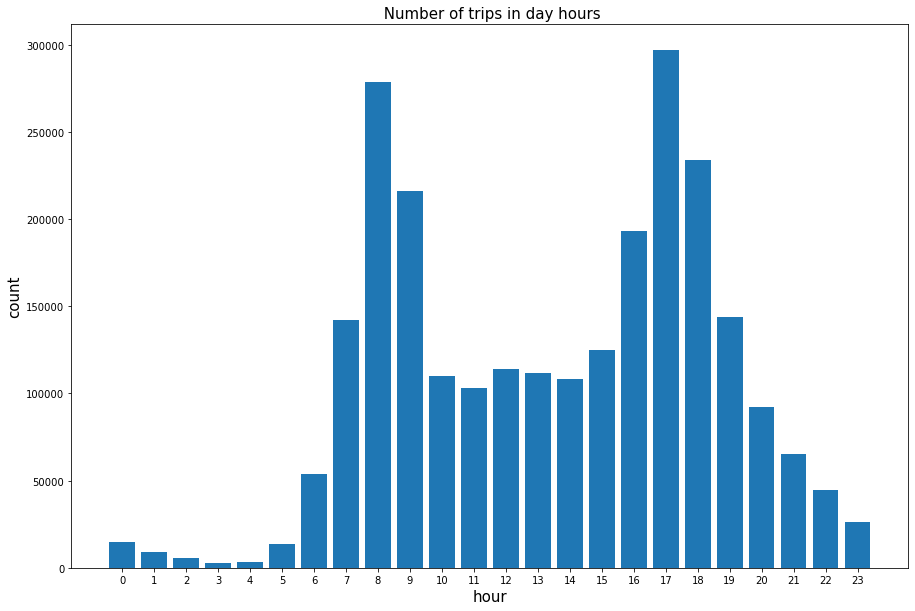

In [10]:
plt.figure(figsize = [15,10])
x_tick_labels = np.arange(0,24,1)
x_tick_labels = x_tick_labels.astype(str)
plt.bar(height = Baywheel_19.groupby(Baywheel_19['start_time'].dt.hour)['start_time'].count(), x = x_tick_labels)
plt.title(" Number of trips in day hours",fontsize = 15)
plt.xlabel('hour',fontsize = 15)
plt.ylabel("count",fontsize = 15);

###  which rental access method is more used ?
> app is more likely to be used as a rental access method .

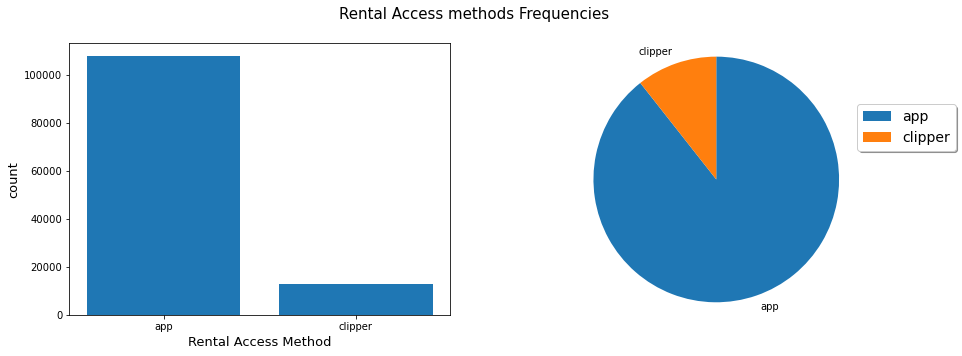

In [13]:
plt.figure(figsize = [15,5])
plt.subplot(1,2,1)
rental_method = Baywheel_19[Baywheel_19['rental_access_method']!= "None"]["rental_access_method"].value_counts()
plt.bar(height = rental_method ,x = rental_method.index)
plt.xlabel('Rental Access Method',fontsize = 13)
plt.ylabel("count",fontsize = 13)
plt.subplot(1,2,2)
plt.pie(x= rental_method.values,labels= rental_method.index ,startangle = 90,counterclock= False)
plt.axis('square')
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 0.8), shadow=True, ncol=1,fontsize = 14)
plt.suptitle("Rental Access methods Frequencies",fontsize = 15);

###  which user type is more ?
> It is clear that most of the users are subscribers

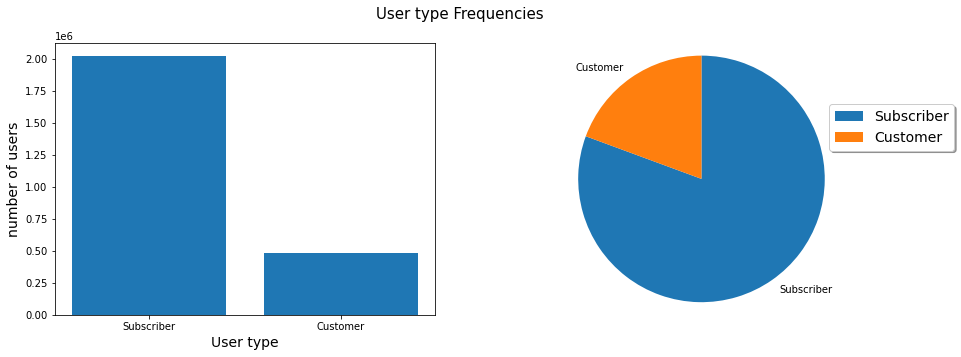

In [14]:
plt.figure(figsize = [15,5])
plt.subplot(1,2,1)
user_type = Baywheel_19["user_type"].value_counts()
plt.bar(height = user_type ,x = user_type.index)
plt.xlabel('User type',fontsize = 14)
plt.ylabel("number of users",fontsize = 14)
plt.subplot(1,2,2)
plt.pie(x= user_type.values,labels= user_type.index ,startangle = 90,counterclock= False)
plt.axis('square')
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 0.8), shadow=True, ncol=1,fontsize = 14)
plt.suptitle("User type Frequencies",fontsize = 15);

### Relation between trip duration , rental_access_method and user type features 
> users who are customers and use app as rental access method ride longer than  customers who use clipper.

> users who are subscribers and use app as rental access method ride longer than  customers who use clipper.

> users who are customers ride for longer trips than subscribers . 


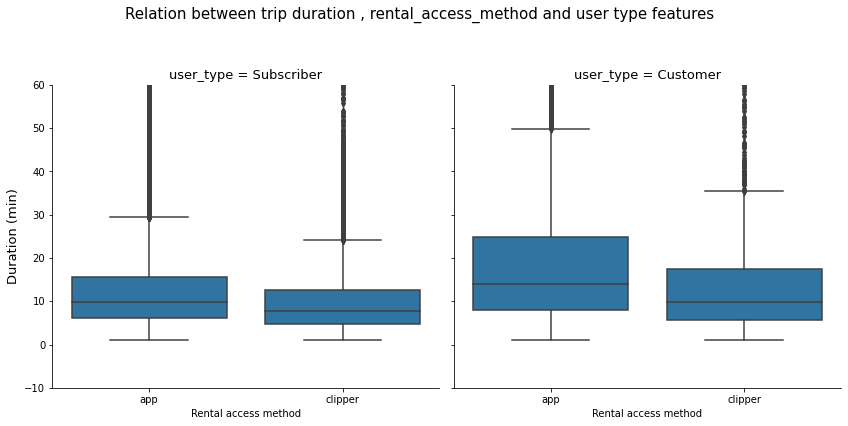

In [29]:
g = sb.FacetGrid(data = Baywheel_19[Baywheel_19.rental_access_method != 'None'], col = 'user_type', height = 6)
g.map(sb.boxplot, 'rental_access_method', 'duration_min')
plt.ylim([-10, 60])
plt.subplots_adjust(top=0.8)
g.set_axis_labels("Rental access method", "Duration (min)" )
g.fig.suptitle('Relation between trip duration , rental_access_method and user type features',fontsize = 15)
for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontsize= 13)
    ax.set_ylabel(ax.get_ylabel(), fontsize=13)